# Multi-armed bandits

## Import librairies and modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time

In [2]:
from arm.Bernoulli import Bernoulli

from algorithm.UCB import UCB
from algorithm.TS import TS
from posterior.Beta import Beta as BetaPosterior
from algorithm.Greedy import Greedy

from environment.MAB import MAB, EvaluationMAB

## Experimental setup

In [3]:
scenario = 0
nb_rep = 100

In [4]:
if scenario == 0:
    horizon = 500
    K = 2
    env = MAB([Bernoulli(p) for p in [0.9, 0.1]])

## Evaluate various bandit algorithms

In [5]:
algorithms = [UCB(K, c=0.5),
              TS(K, BetaPosterior), 
              Greedy(K)]

Start evaluation of UCB
0
10
20
30
40
50
60
70
80
90
Regret of UCB : 3.760000000003913 +- 0.9226050075736598 

Start evaluation of TS
0
10
20
30
40
50
60
70
80
90
Regret of TS : 2.7040000000037026 +- 1.1014463218877066 

Start evaluation of Greedy
0
10
20
30
40
50
60
70
80
90
Regret of Greedy : 8.880000000003122 +- 55.76091821338613 



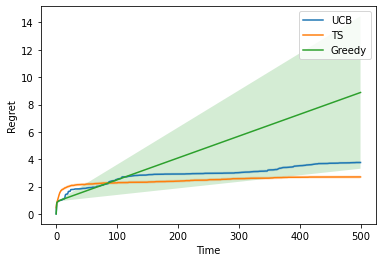

--- 8.392493724822998 seconds ---


In [6]:
start_time = time.time()
c = 0.1

plt.figure()
for algo in algorithms:
    print('Start evaluation of', algo.__class__.__name__)
    ev = EvaluationMAB(env, algo, nb_rep, horizon)
    mean_regret = ev.mean_regret()
    std_regret = ev.std_regret()
    print('Regret of', algo.__class__.__name__, ':', mean_regret[-1], '+-', std_regret[-1], '\n')
    
    plt.plot(np.arange(horizon), mean_regret)
    plt.fill_between(np.arange(horizon), mean_regret-c*std_regret, mean_regret+c*std_regret, alpha=.2)
    plt.xlabel('Time')
    plt.ylabel('Regret')
    

plt.legend([algo.__class__.__name__ for algo in algorithms], loc=0)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))